In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.io as pio

In [2]:
df = pd.read_csv(r"C:\Users\Justin\Desktop\Data\Covid Ohio\Archive\COVIDSummaryData Ohio 8_12_20 Full.csv")

In [3]:
df['Month'] = df['OnsetDate'].str[0] #create a month column via the 'Onset Date' information

In [4]:
df.describe() #curious look at topline counts, not much is of interest due to the way the data is structured currently

,Cases,Deaths,Hospitalized
count,49840.000000,49840.000000,49840.000000
mean,2.063122,0.074398,0.235955
std,5.067306,0.265914,0.438088
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,408.000000,5.000000,4.000000


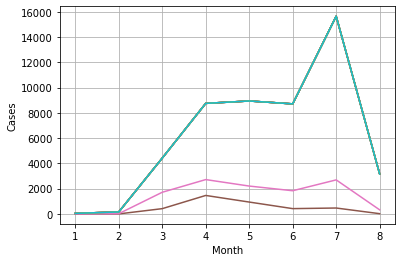

In [5]:
cases = [cases for cases, df in df.groupby('Month')]

plt.plot(cases, df.groupby(['Month']).count())
plt.xticks(cases)
plt.xlabel('Month')
plt.ylabel('Cases')
plt.grid()
plt.show()

#Basic graph, just letting the data stretch it's legs. Will add legend later

In [6]:
df #cleaning up the data, identify any NaN

,FIPS,County,Sex,AgeRange,OnsetDate,Date Of Death,Admission Date,Cases,Deaths,Hospitalized,Month
0,39001,Adams,Female,0-19,4/28/2020,NaN,NaN,1.0,0.0,0.0,4
1,39001,Adams,Female,0-19,6/10/2020,NaN,NaN,1.0,0.0,0.0,6
2,39001,Adams,Female,0-19,6/19/2020,NaN,NaN,1.0,0.0,0.0,6
3,39001,Adams,Female,0-19,6/30/2020,NaN,NaN,1.0,0.0,0.0,6
4,39001,Adams,Female,0-19,7/18/2020,NaN,NaN,1.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...
49836,39175,Wyandot,Male,80+,5/25/2020,NaN,NaN,1.0,0.0,0.0,5
49837,39175,Wyandot,Male,80+,5/25/2020,6/12/2020,6/2/2020,1.0,1.0,1.0,5
49838,39175,Wyandot,Male,80+,7/22/2020,NaN,NaN,2.0,0.0,0.0,7
49839,39175,Wyandot,Male,80+,7/23/2020,8/11/2020,NaN,1.0,1.0,0.0,7


In [7]:
#remove NaN from data set

nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

df = df.dropna(how='all')
df.head() 

,FIPS,County,Sex,AgeRange,OnsetDate,Date Of Death,Admission Date,Cases,Deaths,Hospitalized,Month
0,39001,Adams,Female,0-19,4/28/2020,NaN,NaN,1.0,0.0,0.0,4
1,39001,Adams,Female,0-19,6/10/2020,NaN,NaN,1.0,0.0,0.0,6
2,39001,Adams,Female,0-19,6/19/2020,NaN,NaN,1.0,0.0,0.0,6
3,39001,Adams,Female,0-19,6/30/2020,NaN,NaN,1.0,0.0,0.0,6
4,39001,Adams,Female,0-19,7/18/2020,NaN,NaN,1.0,0.0,0.0,7


,FIPS,County,Sex,AgeRange,OnsetDate,Date Of Death,Admission Date,Cases,Deaths,Hospitalized,Month
0,39001,Adams,Female,0-19,4/28/2020,NaN,NaN,1.0,0.0,0.0,4
1,39001,Adams,Female,0-19,6/10/2020,NaN,NaN,1.0,0.0,0.0,6
2,39001,Adams,Female,0-19,6/19/2020,NaN,NaN,1.0,0.0,0.0,6
3,39001,Adams,Female,0-19,6/30/2020,NaN,NaN,1.0,0.0,0.0,6
4,39001,Adams,Female,0-19,7/18/2020,NaN,NaN,1.0,0.0,0.0,7


In [8]:
df['Cases'] = pd.to_numeric(df['Cases']) 
df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Hospitalized'] = pd.to_numeric(df['Hospitalized'])
df['Month'] = pd.to_numeric(df['Month'])

#Columns to Correct Type

In [9]:
df.groupby(['Month']).sum()

,Cases,Deaths,Hospitalized
Month,,,
1,43.0,0.0,2.0
2,158.0,1.0,18.0
3,5709.0,416.0,1740.0
4,16886.0,1480.0,2769.0
5,15785.0,944.0,2254.0
6,19661.0,415.0,1865.0
7,38360.0,440.0,2787.0
8,6224.0,12.0,325.0


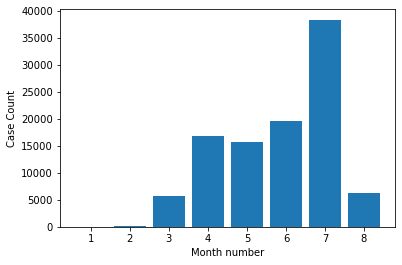

In [10]:
months = range(1,9)

fig1 = plt.gcf()

plt.bar(months,df.groupby(['Month']).sum()['Cases'])
plt.xticks(months)
plt.ylabel('Case Count')
plt.xlabel('Month number')
plt.show()
fig1.savefig('Covid Case Count by Month.png', dpi=300, bbox_inches='tight', transparent=False)

#basic covid cases by month graph

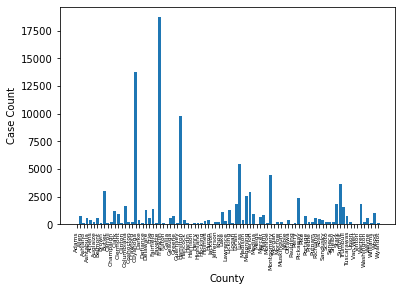

In [11]:
keys = [county for county, df in df.groupby(['County'])]

fig2 = plt.gcf()

plt.bar(keys,df.groupby(['County']).sum()['Cases'])
plt.ylabel('Case Count')
plt.xlabel('County')
plt.xticks(keys, rotation='vertical', size=6)
plt.show()
fig2.savefig('Covid Case Count by County.png', dpi=300, bbox_inches='tight', transparent=False)
#Case counts by county because why not. Save to .png to see what it looks like

In [12]:
df.groupby('County').sum()

,Cases,Deaths,Hospitalized,Month
County,,,,
Adams,61.0,2.0,4.0,393
Allen,769.0,46.0,125.0,3568
Ashland,154.0,3.0,21.0,920
Ashtabula,576.0,46.0,93.0,2524
Athens,360.0,2.0,21.0,1131
...,...,...,...,...
Washington,209.0,22.0,17.0,991
Wayne,545.0,58.0,68.0,2679
Williams,136.0,3.0,9.0,741


In [13]:
df.drop(df.columns[[5,6]], axis=1, inplace=True)

In [14]:
df

,FIPS,County,Sex,AgeRange,OnsetDate,Cases,Deaths,Hospitalized,Month
0,39001,Adams,Female,0-19,4/28/2020,1.0,0.0,0.0,4
1,39001,Adams,Female,0-19,6/10/2020,1.0,0.0,0.0,6
2,39001,Adams,Female,0-19,6/19/2020,1.0,0.0,0.0,6
3,39001,Adams,Female,0-19,6/30/2020,1.0,0.0,0.0,6
4,39001,Adams,Female,0-19,7/18/2020,1.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...
49835,39175,Wyandot,Male,80+,3/28/2020,1.0,1.0,1.0,3
49836,39175,Wyandot,Male,80+,5/25/2020,1.0,0.0,0.0,5
49837,39175,Wyandot,Male,80+,5/25/2020,1.0,1.0,1.0,5
49838,39175,Wyandot,Male,80+,7/22/2020,2.0,0.0,0.0,7


In [15]:
df.groupby('Month').sum()

,Cases,Deaths,Hospitalized
Month,,,
1,43.0,0.0,2.0
2,158.0,1.0,18.0
3,5709.0,416.0,1740.0
4,16886.0,1480.0,2769.0
5,15785.0,944.0,2254.0
6,19661.0,415.0,1865.0
7,38360.0,440.0,2787.0
8,6224.0,12.0,325.0


In [16]:
df2 = df.groupby('Month').sum()

In [17]:
df2

,Cases,Deaths,Hospitalized
Month,,,
1,43.0,0.0,2.0
2,158.0,1.0,18.0
3,5709.0,416.0,1740.0
4,16886.0,1480.0,2769.0
5,15785.0,944.0,2254.0
6,19661.0,415.0,1865.0
7,38360.0,440.0,2787.0
8,6224.0,12.0,325.0


In [18]:
df2.describe()

,Cases,Deaths,Hospitalized
count,8.000000,8.000000,8.000000
mean,12853.250000,463.500000,1470.000000
std,12773.058295,521.249049,1185.617621
min,43.000000,0.000000,2.000000
25%,4321.250000,9.250000,248.250000
50%,11004.500000,415.500000,1802.500000
75%,17579.750000,566.000000,2382.750000
max,38360.000000,1480.000000,2787.000000


AttributeError: 'DataFrame' object has no attribute 'Cases'

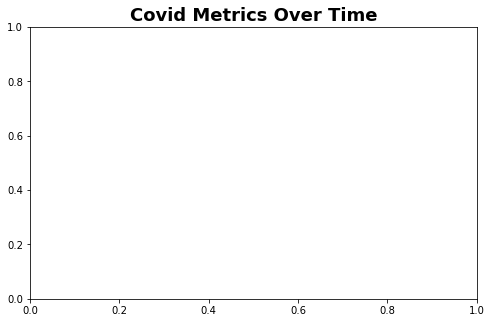

In [19]:
metrics_over_time = pd.read_csv(r'C:\Users\Justin\df2.csv')

plt.figure(figsize=(8,5))

plt.title('Covid Metrics Over Time', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(metrics_over_time.Month, metrics_over_time.Cases, 'b.-', label='Cases')
plt.plot(metrics_over_time.Month, metrics_over_time.Deaths, 'r.-')
plt.plot(metrics_over_time.Month, metrics_over_time.Hospitalized, 'y.-')

# Another Way to plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')

plt.xticks(df.Month[::1].tolist()+[8])

plt.xlabel('Month')
plt.ylabel('Case Count')

plt.legend()

plt.show()

fig3.savefig('Covid Metrics Over Time.png', dpi=300, bbox_inches='tight', transparent=False)

In [ ]:
metrics_over_time = pd.read_csv(r'C:\Users\Justin\df2.csv')

In [ ]:
metrics_over_time

In [ ]:
metrics_over_time.describe()

In [ ]:
#Subtract August due to incomplate data to demonstrate upward climb in cases

metrics_over_time2 = metrics_over_time.loc[df['Month'].str.contains('2|3|4|5|6|7', flags=re.I, regex=True)]

In [ ]:
metrics_over_time2.to_csv('Metrics_over_time2.csv')

In [ ]:
metrics_over_time2 = pd.read_csv(r'C:\Users\Justin\Metrics_over_time2.csv')

Jan_July = plt.figure(figsize=(8,5))

plt.title('Covid Metrics Over Time Up through July', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(metrics_over_time2.Month, metrics_over_time2.Cases, 'b.-', label='Cases')
plt.plot(metrics_over_time2.Month, metrics_over_time2.Deaths, 'r.-')
plt.plot(metrics_over_time2.Month, metrics_over_time2.Hospitalized, 'y.-')

plt.xticks(metrics_over_time2.Month[::1].tolist()+[7])

plt.xlabel('Month')
plt.ylabel('Case Count')

plt.legend()

plt.show()

Jan_July.savefig('Covid Metrics Over Time up through July.png', dpi=300, bbox_inches='tight', transparent=False)

In [ ]:
metrics_over_time2 = pd.read_csv(r'C:\Users\Justin\Metrics_over_time2.csv')

Deaths_Hospitalzed = plt.figure(figsize=(8,5))

plt.title('Covid Deaths & Hospitalizations Over Time Up through July', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(metrics_over_time2.Month, metrics_over_time2.Deaths, 'r.-')
plt.plot(metrics_over_time2.Month, metrics_over_time2.Hospitalized, 'y.-')

plt.xticks(metrics_over_time2.Month[::1].tolist()+[7])

plt.xlabel('Month')
plt.ylabel('Case Count')

plt.show()

In [ ]:
# descrptive summary - cases/deaths/hospitalized by gender, and by age group

# Q's - what age group is drving the cases overall? What age group is drove the origional spike, March/April/May
#What age group is driving the recent spike, June/July only

In [ ]:
df.groupby(['Sex']).sum().sort_values('Cases', ascending=False)

In [ ]:
Gender = df.groupby(['Sex']).sum().sort_values('Cases', ascending=False)
# groupby aggregating statistics

In [ ]:
Gender

In [ ]:
Gender.describe()

In [ ]:
keys = [sex for sex, Gender in Gender.groupby(['Sex'])]

figGender = plt.gcf()
plt.bar(keys,Gender.groupby(['Sex']).sum()['Cases'])
plt.ylabel('Case Count')
plt.xlabel('Gender')
plt.title('Total Covid Cases by Gender, OH')
plt.xticks(keys, rotation='vertical', size=10)
    
plt.show()

In [ ]:
keys1 = [sex for sex, Gender in Gender.groupby(['Sex'])]

figGender = plt.gcf()
plt.bar(keys1,Gender.groupby(['Sex']).sum()['Deaths'])
plt.ylabel('Deaths')
plt.xlabel('Gender')
plt.title('Total Covid Deaths by Gender, OH')
plt.xticks(keys1, rotation='vertical', size=10)
    
plt.show()

In [ ]:
Gender.to_csv('GenderOHCovid.csv')

In [ ]:
GenderOH = pd.read_csv(r'C:\Users\Justin\GenderOHCovid.csv')

In [ ]:
# Graph - Covid metrics by Gender (total)

# Setting the positions and width for the bars
pos = list(range(len(GenderOH['Deaths'])))
width = 0.3

# Plotting the bars
fig4, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data
plt.bar(pos, GenderOH['Deaths'], width, alpha=0.5, color='#EE3224')
#plt.show()

 # Create a bar with mid_score data,
plt.bar([p + width for p in pos], GenderOH['Cases'], width, alpha=0.5, color='#F78F1E')
#plt.show()

# Create a bar with post_score data,
plt.bar([p + width*2 for p in pos], GenderOH['Hospitalized'], width, alpha=0.5, color='#FFC222')
#plt.show()

# Set the y axis label
ax.set_ylabel('Cases')
ax.set_xlabel('Gender')

# Set the chart's title
ax.set_title('OH Covid Metrics by Gender')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(GenderOH['Sex'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(GenderOH['Deaths'] + GenderOH['Cases'] + GenderOH['Hospitalized'])] )

# Adding the legend and showing the plot
plt.legend(['Deaths', 'Cases', 'Hospitalized'], loc='upper right')
plt.grid()
plt.show()
fig4.savefig('Covid Metrics by Gender OH.png', dpi=300, bbox_inches='tight', transparent=False)

In [ ]:
pos = list(range(len(GenderOH['Deaths'])))
width = 0.3

figDH, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, GenderOH['Deaths'], width, alpha=0.5, color='#EE3224')

plt.bar([p + width*1 for p in pos], GenderOH['Hospitalized'], width, alpha=0.5, color='#FFC222')

ax.set_ylabel('Cases')
ax.set_xlabel('Gender')

ax.set_title('OH Covid Metrics by Gender')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(GenderOH['Sex'])

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(GenderOH['Deaths'] + GenderOH['Hospitalized'])] )

plt.legend(['Deaths', 'Hospitalized'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
import re

In [ ]:
# Age ranges -total

Age = df.groupby(['AgeRange']).sum().sort_values('Cases', ascending=False)

In [ ]:
Age

In [ ]:
keys = [age for age, Age in Age.groupby(['AgeRange'])]

figAge = plt.gcf()
plt.bar(keys,Age.groupby(['AgeRange']).sum()['Cases'])
plt.ylabel('Case Count')
plt.xlabel('AgeRange')
plt.title('Total Covid Cases by Age Range, OH')
plt.xticks(keys, rotation='vertical', size=10)

plt.show()
#total by gender
#overall, younger demo pushing the covid caseload higher in total - next: breakdown by each spike

In [ ]:
# What age range was driving the initial surge of Covid cases in the months of 3,4,5

dfage345 = df.loc[df['Month'].str.contains('3|4|5', flags=re.I, regex=True)].sort_values('AgeRange')

In [ ]:
dfage345

In [ ]:
dfage345['Count'] = 1

In [ ]:
dfage345.groupby(['AgeRange']).count()['Count']

#skews older - 40-80+ age range

In [ ]:
# What age range was driving the initial surge of Covid cases in the month of July (7)

dfage67 = df.loc[df['Month'].str.contains('6|7', flags=re.I, regex=True)].sort_values('AgeRange')

In [ ]:
dfage67['Count'] = 1

In [ ]:
dfage67.groupby(['AgeRange']).count()['Count']

# More evenly spread than i would have thought. 20-29 & 50-59 similar in # of cases. Massive case increase in younger age ranges

In [ ]:
County = df.groupby('County').sum()

In [ ]:
County

In [ ]:
County.to_csv('CountyCovidOH.csv')

In [ ]:
County = pd.read_csv(r'C:\Users\Justin\CountyCovidOH.csv')

In [ ]:
County = pd.DataFrame(County, dtype=object)

In [ ]:
County.astype(np.int64)

In [ ]:
County.fillna(0.0).astype(int)

In [ ]:
County2 = pd.pivot_table(County, values=['Cases','Deaths','Hospitalized'], index='County', aggfunc='max')
County['Death Rate'] = round(County['Deaths'] /County['Cases'], 2)
County2 = County.sort_values(by='Cases', ascending= False)
County2.style\
    .background_gradient(cmap='Blues')\
    .set_precision(2)

In [ ]:
County2.to_excel('CountyPivot.xlsx')

In [ ]:
fig = px.line(df, x="OnsetDate", y="Cases", color='County', height=600,
             title='Cases', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.line(df, x="OnsetDate", y="Deaths", color='County', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.line(df, x="OnsetDate", y="Hospitalized", color='County', height=600,
             title='Hospitalized', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

In [ ]:
franklin = df.loc[df['County'].str.contains('Franklin', flags=re.I, regex=True)]

In [ ]:
franklin

In [ ]:
fig = px.line(franklin, x="OnsetDate", y="Cases", color='County', height=600,
             title='Cases', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.line(franklin, x="OnsetDate", y="Deaths", color='County', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()


fig = px.line(franklin, x="OnsetDate", y="Hospitalized", color='County', height=600,
             title='Hospitalized', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

In [ ]:
franklindate = franklin.groupby('OnsetDate').sum()

In [ ]:
franklindate.drop(['Month'], axis=1)

In [ ]:
franklindate = franklindate.drop(['Month'], axis=1)

In [ ]:
franklindate1 = pd.pivot_table(franklindate, values=['Cases','Deaths','Hospitalized'], index='OnsetDate', aggfunc='max')
franklindate['Death Rate'] = round(franklindate['Deaths'] /franklindate['Cases'], 2)
franklindate1 = franklindate.sort_values(by='OnsetDate', ascending= False)
franklindate1.style\
    .background_gradient(cmap='Blues')\
    .set_precision(2)

In [ ]:
franklindate1.to_excel('FranklinPivot.xlsx')